## Mownit laboratorium 2
### DataFrames

### Zadanie 
- Napisać program w języku C używającego  interfejsu GSL do BLAS:<a href="https://www.gnu.org/software/gsl/doc/html/blas.html?highlight=blas#c.gsl_blas_ddot"> funkcji gsl_blas_ddot </a> (mnożenie dwóch wektorów) i 
<a href="https://www.gnu.org/software/gsl/doc/html/blas.html?highlight=blas#c.gsl_blas_dgemv">gsl_blas_dgemv</a> (mnożenie macierzy przez wektor). <a href="https://www.gnu.org/software/gsl/doc/html/blas.html?highlight=blas#examples"> Przykłady użycia.</a>
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji BLAS w zależności od rozmiaru wektora (macierzy) osobno dla poziomu 1 i poziomu 2. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. Prosze poukladac wykresy  w tabalke za pomoca  opcji layout
- Należy zadbać o staranne podpisanie osi i wykresów.

In [81]:
using CSV
input="blas_meas.csv"
mydata=CSV.read(input, delim=";")

,BLAS1_10,BLAS2_10,BLAS1_20,BLAS2_20,BLAS1_30,BLAS2_30,BLAS1_40,BLAS2_40,BLAS1_50,BLAS2_50,BLAS1_60,BLAS2_60,BLAS1_70,BLAS2_70,BLAS1_80,BLAS2_80,BLAS1_90,BLAS2_90,BLAS1_100,BLAS2_100,BLAS1_200,BLAS2_200,BLAS1_300,BLAS2_300,BLAS1_400,BLAS2_400,BLAS1_500,BLAS2_500,BLAS1_600,BLAS2_600,BLAS1_700,BLAS2_700,BLAS1_800,BLAS2_800,BLAS1_900,BLAS2_900,BLAS1_1000,BLAS2_1000,BLAS1_2000,BLAS2_2000,BLAS1_3000,BLAS2_3000,BLAS1_4000,BLAS2_4000,BLAS1_5000,BLAS2_5000,BLAS1_6000,BLAS2_6000,BLAS1_7000,BLAS2_7000,BLAS1_8000,BLAS2_8000,BLAS1_9000,BLAS2_9000,BLAS1_10000,BLAS2_10000,BLAS1_20000,BLAS2_20000,BLAS1_30000,BLAS2_30000,BLAS1_40000,BLAS2_40000,BLAS1_50000,BLAS2_50000,BLAS1_60000,BLAS2_60000,BLAS1_70000,BLAS2_70000,BLAS1_80000,BLAS2_80000,BLAS1_90000,BLAS2_90000,BLAS1_100000,BLAS2_100000,BLAS1_110000,BLAS2_110000,BLAS1_120000,BLAS2_120000,BLAS1_130000,BLAS2_130000,BLAS1_140000,BLAS2_140000,BLAS1_150000,BLAS2_150000,BLAS1_160000,BLAS2_160000,BLAS1_170000,BLAS2_170000,BLAS1_180000,BLAS2_180000,BLAS1_190000,BLAS2_190000,BLAS1_200000,BLAS2_200000,BLAS1_210000,BLAS2_210000,BLAS1_220000,BLAS2_220000,BLAS1_230000,BLAS2_230000,BLAS1_240000,BLAS2_240000,BLAS1_250000,BLAS2_250000,BLAS1_260000,BLAS2_260000,BLAS1_270000,BLAS2_270000,BLAS1_280000,BLAS2_280000,BLAS1_290000,BLAS2_290000,BLAS1_300000,BLAS2_300000,BLAS1_310000,BLAS2_310000,BLAS1_320000,BLAS2_320000,BLAS1_330000,BLAS2_330000,BLAS1_340000,BLAS2_340000,BLAS1_350000,BLAS2_350000,BLAS1_360000,BLAS2_360000,BLAS1_370000,BLAS2_370000,BLAS1_380000,BLAS2_380000,BLAS1_390000,BLAS2_390000,BLAS1_400000,BLAS2_400000,BLAS1_410000,BLAS2_410000,BLAS1_420000,BLAS2_420000,BLAS1_430000,BLAS2_430000,BLAS1_440000,BLAS2_440000,BLAS1_450000,BLAS2_450000,BLAS1_460000,BLAS2_460000,BLAS1_470000,BLAS2_470000,BLAS1_480000,BLAS2_480000,BLAS1_490000,BLAS2_490000,BLAS1_500000,BLAS2_500000
,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,0.008,0.006,0.002,0.003,0.003,0.002,0.002,0.002,0.003,0.003,0.003,0.003,0.003,0.004,0.003,0.004,0.003,0.003,0.003,0.004,0.005,0.006,0.005,0.005,0.005,0.006,0.005,0.008,0.007,0.008,0.007,0.009,0.007,0.012,0.008,0.011,0.008,0.012,0.013,0.021,0.005,0.008,0.006,0.01,0.009,0.013,0.008,0.015,0.01,0.018,0.011,0.022,0.012,0.022,0.013,0.025,0.026,0.049,0.038,0.073,0.051,0.098,0.063,0.125,0.079,0.157,0.083,0.165,0.094,0.197,0.135,0.273,0.112,0.224,0.123,0.283,0.199,0.429,0.142,0.299,0.148,0.317,0.16,0.423,0.18,0.384,0.183,0.408,0.196,0.435,0.204,0.462,0.291,0.489,0.23,0.516,0.243,0.554,0.254,0.564,0.265,0.587,0.278,0.622,0.295,0.649,0.3,0.662,0.314,0.703,0.325,0.739,0.336,0.757,0.388,0.892,0.451,0.933,0.377,0.841,0.39,0.898,0.405,0.885,0.414,0.914,0.44,0.942,0.432,0.966,0.447,1.012,0.457

In [82]:
using Statistics
using DataFrames
described = describe(mydata, stats=:all)

,variable,mean,std,min,q25,median,q75,max,nunique,nmissing,first,last,eltype
,Symbol,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Nothing,Int64,Float64,Float64,DataType
1,BLAS1_10,0.0013,0.00240601,0.0,0.0,0.001,0.001,0.008,,0,0.008,0.0,Float64
2,BLAS2_10,0.0015,0.00158114,0.001,0.001,0.001,0.001,0.006,,0,0.006,0.001,Float64
3,BLAS1_20,0.0008,0.000632456,0.0,0.00025,0.001,0.001,0.002,,0,0.002,0.0,Float64
4,BLAS2_20,0.0007,0.000948683,0.0,0.0,0.0005,0.001,0.003,,0,0.003,0.0,Float64
5,BLAS1_30,0.0005,0.000971825,0.0,0.0,0.0,0.00075,0.003,,0,0.003,0.001,Float64
6,BLAS2_30,0.0009,0.000567646,0.0,0.001,0.001,0.001,0.002,,0,0.002,0.0,Float64
7,BLAS1_40,0.0005,0.000707107,0.0,0.0,0.0,0.001,0.002,,0,0.002,0.001,Float64
8,BLAS2_40,0.0006,0.000699206,0.0,0.0,0.0005,0.001,0.002,,0,0.002,0.001,Float64
9,BLAS1_50,0.0008,0.000918937,0.0,0.0,0.001,0.001,0.003,,0,0.003,0.0,Float64


In [83]:
toPlot = DataFrame(Symbols=described[:variable], Means=described[:mean], Stds = described[:std],e=map(x->(x+1)%2,(1:154)))
toPlot[55:80,:]

,Symbols,Means,Stds,e
,Symbol,Float64,Float64,Int64
1,BLAS1_10000,0.0105,0.000971825,0
2,BLAS2_10000,0.0198,0.0018738,1
3,BLAS1_20000,0.0199,0.00218327,0
4,BLAS2_20000,0.0395,0.00337474,1
5,BLAS1_30000,0.0299,0.00284605,0
6,BLAS2_30000,0.059,0.00494413,1
7,BLAS1_40000,0.0399,0.00392853,0
8,BLAS2_40000,0.0788,0.00692499,1
9,BLAS1_50000,0.0526,0.00911897,0


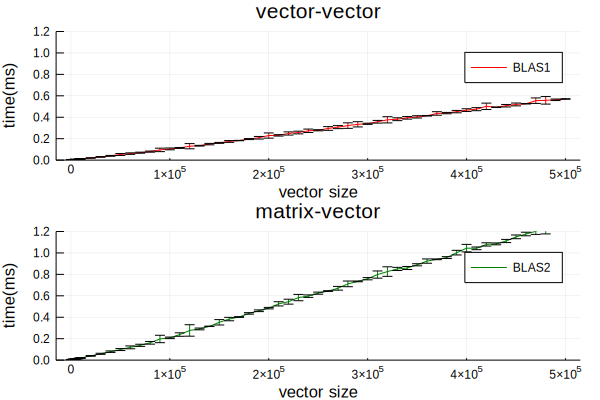

In [89]:
using Plots
Nums = [10, 10,20, 20,30, 30,40, 40,50, 50,60, 60,70, 70,80, 80,90, 90,100, 100,200, 200,300, 300,400, 400,500, 500,600, 600,700, 700,800, 800,900, 900,1000, 1000,2000, 2000,3000, 3000,4000, 4000,5000, 5000,6000, 6000,7000, 7000,8000, 8000,9000, 9000,10000, 10000,20000, 20000,30000, 30000,40000, 40000,50000, 50000,60000, 60000,70000, 70000,80000, 80000,90000, 90000,100000, 100000,110000, 110000,120000, 120000,130000, 130000,140000, 140000,150000, 150000,160000, 160000,170000, 170000,180000, 180000,190000, 190000,200000, 200000,210000, 210000,220000, 220000,230000, 230000,240000, 240000,250000, 250000,260000, 260000,270000, 270000,280000, 280000,290000, 290000,300000, 300000,310000, 310000,320000, 320000,330000, 330000,340000, 340000,350000, 350000,360000, 360000,370000, 370000,380000, 380000,390000, 390000,400000, 400000,410000, 410000,420000, 420000,430000, 430000,440000, 440000,450000, 450000,460000, 460000,470000, 470000,480000, 480000,490000, 490000,500000, 500000]
plot(Nums,toPlot[:2], group = toPlot[:e],ylims=(0,1.2), yticks=0.0:0.2:1.2, layout=grid(2,1), yerr = toPlot[:Stds], colour = [:red :green],
    title = ["vector-vector" "matrix-vector"], label=["BLAS1" "BLAS2"], xlabel = "vector size", ylabel="time(ms)")

In [ ]:
#include<gsl/gsl_blas.h>
#include<stdio.h>
#include<sys/times.h>
#include <unistd.h>
#include <time.h> 



gsl_vector* create_vector(int vec_size){
    gsl_vector * a = gsl_vector_alloc(vec_size);
     for(int i = 0; i< a->size; i++){
         gsl_vector_set(a,i,2.0);
     }
     return a;
}

void test_vector(int vec_size){
    clock_t clk_1; 
    clock_t clk_2;
    double time_taken;
    double result;
    gsl_vector * a = create_vector(vec_size);
    for(int i = 0; i< a->size; i++){
         gsl_vector_set(a,i,2.0);
     }
    
    double am[2*(vec_size)];
    for(int i = 0; i< vec_size; i++){
        am[i] = (2*a->data[i]);
        am[i+a->size] = a->data[i];
    }
     gsl_vector * c = gsl_vector_calloc(2);

  gsl_matrix_view A = gsl_matrix_view_array(am, 2,a->size);

    clk_1 = clock(); 
    gsl_blas_ddot(a,a,&result);
    clk_1 = clock() - clk_1; 
    time_taken = (((double)clk_1)/CLOCKS_PER_SEC)*1000;  
    printf("%f;", time_taken); 
    clk_2 = clock(); 
    gsl_blas_dgemv(CblasNoTrans, 1.0, &A.matrix, a,0.0, c);
    clk_2 = clock() - clk_2; 
    time_taken = (((double)clk_2)/CLOCKS_PER_SEC)*1000;  
    if(vec_size == 500000){
        printf("%f\n", time_taken); 
    }
    else printf("%f;",time_taken); 
    free(a);
    free(c);
}

void print_table(){

    for(int i = 10; i<100 ;i = i+10){
        printf("%i, %i,",i,i);
    }
    for(int i = 100; i < 1000; i = i+100){
        printf("%i, %i,",i,i);
    }
    for(int i = 1000; i<10000; i = i + 1000){
        printf("%i, %i,",i,i);
    }
    
    for(int i = 10000; i<=500000; i = i + 10000){
        printf("%i, %i,",i,i);
    }
}

int main(){
    
    for(int i = 10; i<100 ;i = i+10){
        printf("BLAS1_%i;BLAS2_%i;",i,i);
    }
    for(int i = 100; i < 1000; i = i+100){
        printf("BLAS1_%i;BLAS2_%i;",i,i);
    }
    for(int i = 1000; i < 10000; i = i+1000){
        printf("BLAS1_%i;BLAS2_%i;",i,i);
    }
    for(int i = 10000; i<=500000; i = i + 10000){
    if(i == 500000) {
            printf("BLAS1_%i;BLAS2_%i\n",i,i);
        }
        else printf("BLAS1_%i;BLAS2_%i;",i,i);
    }

    for(int k = 0; k<10; k++){
    
    for(int i = 10; i<100 ;i = i+10){
        test_vector(i);
    }
    for(int i = 100; i < 1000; i = i+100){
        test_vector(i);
    }
    for(int i = 1000; i<10000; i = i + 1000){
        test_vector(i);
    }
    
    for(int i = 10000; i<=500000; i = i + 10000){
        test_vector(i);
    }
    // print_table();
    }


     
}